## Summary 

- Goal: Determine what caused the dip at the end of the chart shown above and, if appropriate, recommending solutions for the problem.

- Hypothesis to test: 
        a) Less engagement: people do not like the product anymore
        b) Seasonal dip 
        c) 'Wrong' measuring of the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import dates
import seaborn as sns

In [2]:
users = pd.read_csv('Data/yammer_users.csv')
events = pd.read_csv('Data/yammer_events.csv') 
emails = pd.read_csv('Data/yammer_emails.csv')

In [3]:
data = pd.merge(events, users, on='user_id', how='left')
data.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,created_at,company_id,language,activated_at,state
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active


In [4]:
# Convert date columns to datetime type
data['occurred_at'] = pd.to_datetime(data['occurred_at'])

In [5]:
# Create week, start and end columns
data['occurred_period'] = data['occurred_at'].dt.to_period(freq='W')
data['occurred_start'] = data['occurred_period'].dt.start_time
data['occurred_end'] =  data['occurred_period'].dt.end_time

In [6]:
# Delete non-engaged users
engaged = data[data['event_type'] == 'engagement']
engaged_group = engaged.groupby('occurred_start')['user_id'].nunique().to_frame().reset_index()
engaged_group.head()

,occurred_start,user_id
0,2014-04-28,701
1,2014-05-05,1054
2,2014-05-12,1094
3,2014-05-19,1147
4,2014-05-26,1113


Text(0.5,1,'User engagement')

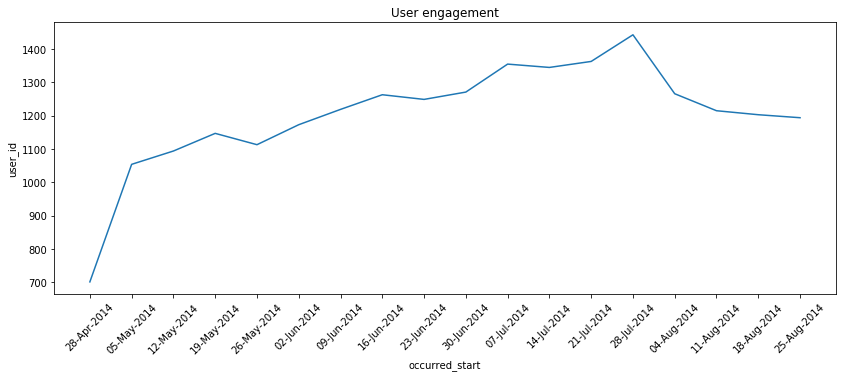

In [7]:
# Plot user engagement
fig = plt.subplots(1, 1, figsize=(14, 5))
ax = sns.lineplot(data=engaged_group, x='occurred_start', y='user_id')
ax.set(xticks=engaged_group.occurred_start.values)
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b-%Y"))
plt.xticks(rotation=45)
plt.title('User engagement')

In [10]:
engaged.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,created_at,company_id,language,activated_at,state,occurred_period,occurred_start,occurred_end,created_at_month
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,2014-04-28/2014-05-04,2014-04-28,2014-05-04,2014-04
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,2014-04-28/2014-05-04,2014-04-28,2014-05-04,2014-04
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,2014-04-28/2014-05-04,2014-04-28,2014-05-04,2014-04
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,2014-04-28/2014-05-04,2014-04-28,2014-05-04,2014-04
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,2014-04-28/2014-05-04,2014-04-28,2014-05-04,2014-04


In [9]:
# Create a line plot with a line for users who created an account per month
engaged['created_at'] = pd.to_datetime(engaged['created_at'])
engaged['created_at_month'] = engaged['created_at'].dt.to_period(freq='M')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Plot data per month of account created
engaged_month = engaged.groupby('occurred_start')[['user_id', 'created_at_month']].nunique().reset_index()


In [19]:
month_piv = engaged_month.pivot(index='occurred_start', columns='created_at_month', values='user_id')

In [22]:
month_piv

created_at_month,17,18,19,20
occurred_start,,,,
2014-04-28,701.0,NaN,NaN,NaN
2014-05-05,1054.0,NaN,NaN,NaN
2014-05-12,1094.0,NaN,NaN,NaN
2014-05-19,1147.0,NaN,NaN,NaN
2014-05-26,NaN,1113.0,NaN,NaN
2014-06-02,NaN,1173.0,NaN,NaN
2014-06-09,NaN,1219.0,NaN,NaN
2014-06-16,NaN,1263.0,NaN,NaN
2014-06-23,NaN,1249.0,NaN,NaN


In [ ]:
# Convert date columns to datetime type
data['created_at'] = pd.to_datetime(data['created_at'])
data['activated_at'] = pd.to_datetime(data['activated_at'])
data['aoccurred_at_x'] = pd.to_datetime(data['occurred_at_x'])
data['occurred_at_y'] = pd.to_datetime(data['occurred_at_y'])

In [ ]:
# Only look at event_type == engagement
data['event_type'].unique()

In [ ]:
data['event_type'].value_counts()

In [ ]:
data = data[data['event_type'] == 'engagement']

In [ ]:
print(len(data))
print(data['event_type'].value_counts())

In [ ]:
data['occurred_at_x'][:20]

In [ ]:
# Set index to occured_at event
data.set_index('occurred_at_x', inplace=True)

In [ ]:
data.head()